# Loading data items CSV

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [2]:
fname = 'data/data_items.csv'
df = pd.read_csv(fname, header=1)

FileNotFoundError: File b'data/data_items.csv' does not exist

In [ ]:
df = df.iloc[:195, :]
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [5]:
df.head()

,Title,Year,Authors,Journal / Origin,Arxiv,Lab / School / Company,Pages,Domain 1,Domain 2,Domain 3,...,Analysis of learned parameters,Discussion,Limitations,Code available,Code hosted on,Limited data,Others & Comments,First Reader,Second Reader,Citation
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,Classification of EEG signals,Monitoring,Cognitive,...,No,"""This study does not impose in any way a direc...",NaN,No,NaN,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela,Almogbel2018
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Improvement of processing tools,Signal cleaning,Artifact handling,...,NaN,"""Compared with the classical OAs removal metho...",NaN,No,NaN,No,Poorly written... :( The way some elements are...,Yannick,Hubert,Yang2018
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,Classification of EEG signals,Clinical,Sleep,...,No,"""... our framework provides a practicable, val...",N/M,No,NaN,No,"Great paper, with most of the information avai...",Yannick,Hubert,Patanaik2018
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,Classification of EEG signals,Clinical,Epilepsy,...,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,NaN,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert,Hussein2018
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,Classification of EEG signals,BCI,Reactive,...,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,NaN,No,They say that it could go up to 220 commands!!...,Yannick,Hubert,Perez-Benitez2018


## Sanity checks

/home/isabela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


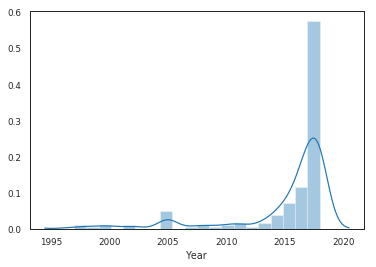

In [6]:
sns.distplot(df['Year'].dropna(axis=0))

/home/isabela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


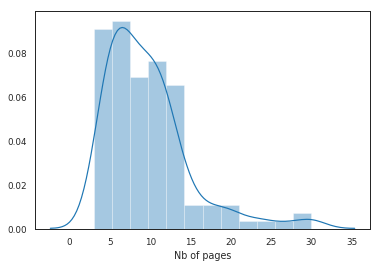

In [7]:
sns.distplot(df['Nb of pages'].dropna(axis=0))

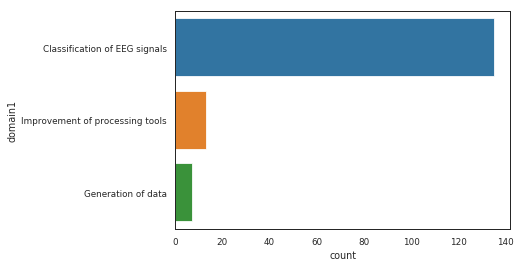

In [8]:
sns.countplot(y='domain1', data=df)

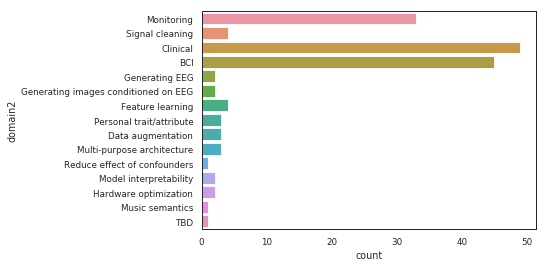

In [8]:
sns.countplot(y='domain2', data=df)

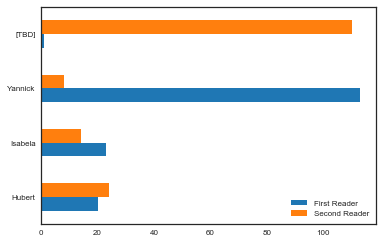

In [131]:
#df[['Analyzed by', 'Reviewed by']].apply(pd.value_counts).plot(kind='barh')
df[['First Reader', 'Second Reader']].apply(pd.value_counts).plot(kind='barh')

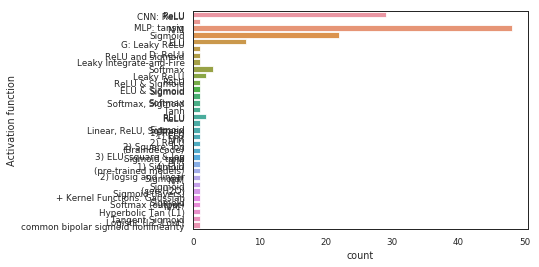

In [10]:
sns.countplot(y='Activation function', data=df)

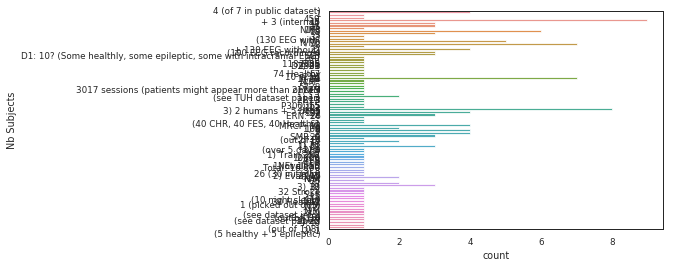

In [11]:
sns.countplot(y='Nb Subjects', data=df)

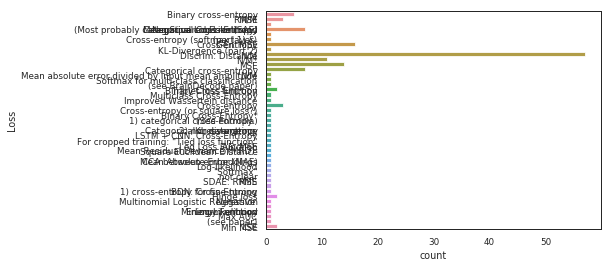

In [12]:
sns.countplot(y='Loss', data=df)

# Domains

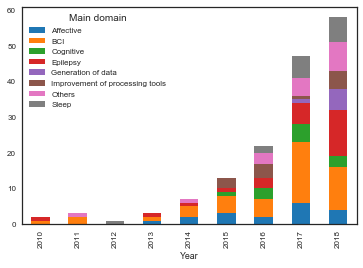

In [50]:
df['Year'] = df['Year'].astype('int32')
main_domains = ['Epilepsy', 'Sleep', 'BCI', 'Affective', 'Cognitive', 
                'Improvement of processing tools', 'Generation of data']
domains_df = df[['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4']]
df['Main domain'] = [row[row.isin(main_domains)].values[0] 
                              if any(row.isin(main_domains)) else 'Others' for ind, row in domains_df.iterrows()]
df.groupby(['Year', 'Main domain']).size().unstack('Main domain').plot(kind='bar', stacked=True, title='')

plt.savefig("../figs/{}.eps".format("Domains per Years"), bbox_inches='tight', format='eps', dpi=1000)

## Yannick addons. (temp stuff)

#1 - Download:
https://docs.google.com/spreadsheet/ccc?key=1smpU0WSlSq-Al2u_QH3djGn68mTuHlth2fNJTrD3wa8&output=csv

#2 - Rename it to "papers.csv"

In [34]:
%matplotlib inline

fname = '../data/papers.csv'
df = pd.read_csv(fname, header=1)

In [35]:
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [36]:
print(str(len(df)) + " studies.")
df.head()

156 studies.


,Title,Year,Authors,Journal / Origin,Preprint first,Type of paper,Lab / School / Company,Country,Pages,Domain 1,...,Model inspection (clean),Discussion,Limitations,Code available,Code hosted on,Limited data,Others & Comments,First Reader,Second Reader,Citation
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Conference,Waseda University,Japan,4.0,Classification of EEG signals,...,No,"""This study does not impose in any way a direc...",NaN,No,NaN,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela,Almogbel2018
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Journal,Key Laboratory of Power Station Automation Tec...,China,11.0,Improvement of processing tools,...,No,"""Compared with the classical OAs removal metho...",NaN,No,NaN,No,Poorly written... :( The way some elements are...,Yannick,Hubert,Yang2018
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,Journal,"Duke-NUS Medical School, Singapore\nUniversity...",Singapore,11.0,Classification of EEG signals,...,No,"""... our framework provides a practicable, val...",N/M,No,NaN,No,"Great paper, with most of the information avai...",Yannick,Hubert,Patanaik2018
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,Preprint,UBC,Canada,12.0,Classification of EEG signals,...,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,NaN,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert,Hussein2018
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,Conference,"National Polytechnic Institute, Mexico",Mexico,7.0,Classification of EEG signals,...,Analysis of weights,The analysis of the DNN first layer weights re...,N/M,No,NaN,No,They say that it could go up to 220 commands!!...,Yannick,Hubert,Perez-Benitez2018


In [7]:
# Inspired by: AKuederle
# https://github.com/AKuederle/Py-Tex-automation-example

import pandas as pd
import tex_utils

#papers = pd.read_csv('./paperx.csv')
#papers = pd.read_csv('./papers.csv', header=1)
papers = df

papers = papers.dropna(axis=1, how='all')

# ===============================================
# Need to run Main Domains Cell before this one!
# ===============================================
domains = set(papers['Main domain'].dropna(axis=0, how='all'))

nested_datasets = {}

for domain in domains:
    print('Domain:' + domain)

    sub_papers = papers[papers['Main domain'] == domain]
    sub_datasets = sub_papers['Dataset name'].dropna(axis=0, how='all')

    # 1 Paper might use multiple datasets
    l = [dsname.split(";\n") for dsname in sub_datasets]
    sub_datasets = set([item for sublist in l for item in sublist])

    # ========================================
    # Handle exception to make it "prettier".
    # Exception 1: Combining datasets.
    # - BCI Competition Datasets.
    # ========================================
    tex_utils.combine_datasets(sub_datasets, "BCI Competition")
    tex_utils.combine_datasets(sub_datasets, "TUH")

    # Step 3 - Create nested list of publications per dataset for this domain.
    nested_list = {k: list(sub_papers[sub_papers['Dataset name'].str.contains(k)]['Citation']) for k in sub_datasets}

    # ========================================
    # Handle exception to make it "prettier".
    # Exception 2: Datasets used only once.
    # ========================================
    toBeRemoved = []
    others = []
    for dataset in nested_list:
        if len(nested_list[dataset]) < 2:
            others.append(nested_list[dataset])
            toBeRemoved.append(dataset)

    for dataset in toBeRemoved:
        nested_list.pop(dataset)

    others = [val for sublist in others for val in sublist]
    if len(others) > 0:
        nested_list['Other Datasets'] = others

    #if 'Internal Recordings' in nested_list:
    #    nested_list = move_element(nested_list, "Internal Recordings", 1)
    #if 'Others' in nested_list:
    #    nested_list = move_element(nested_list, "Others", 2)

    # Step 4 - Save the final list of papers per dataset for this domain.
    nested_datasets[domain] = nested_list

print('LaTeX!')
template = tex_utils.get_template('./table_template.tex')
variable_dict = {'datasets': nested_datasets}
texstr = tex_utils.compile_pdf_from_template(template, variable_dict, './dataset_table.pdf')
print('Done!')

ImportError: No module named 'tex_utils'

# Data Quantity - Nb Subjects

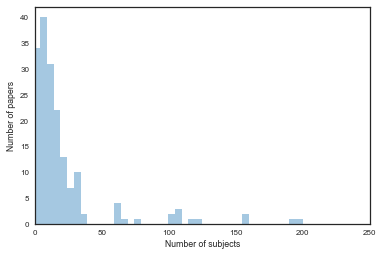

In [98]:
sub_dt = df['Data - subjects'].dropna(axis=0, how='all')
list_dt = [dt.split(";\n") for dt in sub_dt]
sub_dt = [item for sublist in list_dt for item in sublist]

df2 = pd.DataFrame(data={'subjects':sub_dt, 'id':list(range(0, len(sub_dt)))})
df2['subjects'] = df2['subjects'].astype('float')

fig, ax = plt.subplots()
sns.distplot(list(df2['subjects'][df2['subjects'] < 250]), kde=False)
plt.xlabel('Number of subjects')
plt.ylabel('Number of papers')
ax.set_xlim([0, 250])

#fig, axes = plt.subplots(nrows=3, ncols=1)
#df2.plot(x='id', y='subjects', kind='scatter', ax=axes[0])
#df2.plot(x='id', y='subjects', kind='scatter', ax=axes[1], ylim=[0,250])
#df2.plot(x='id', y='subjects', kind='scatter', ax=axes[2], ylim=[0,50])

plt.savefig("../figs/{}.eps".format("NbSubjects"), bbox_inches='tight', format='eps', dpi=1000)

# Data Quantity - Nb Channels

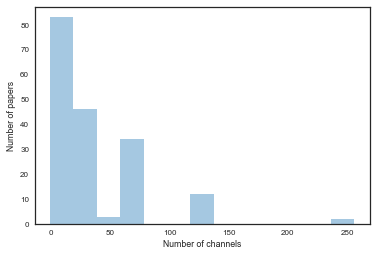

In [143]:
sub_dt = df['Nb Channels'].dropna(axis=0, how='all')
list_dt = [dt.split(";\n") for dt in sub_dt]
sub_dt = [float(item) for sublist in list_dt for item in sublist]

df2 = pd.DataFrame(data={'channels':sub_dt, 'id':list(range(0, len(sub_dt)))})

fig, ax = plt.subplots()
sns.distplot(df2['channels'].dropna(axis=0), kde=False)
#ax.set_xlim([-10, 260])
plt.xlabel('Number of channels')
plt.ylabel('Number of papers')

plt.savefig("../figs/{}.eps".format("NbChannels"), bbox_inches='tight', format='eps', dpi=1000)

# Sampling Rate

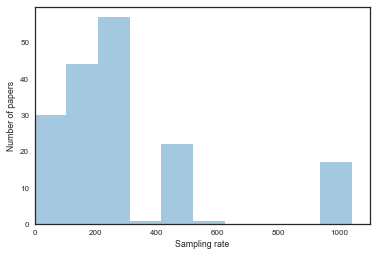

In [142]:
sub_dt = df['Sampling rate'].dropna(axis=0, how='all')
list_dt = [dt.split(";\n") for dt in sub_dt]
sub_dt = [float(item) for sublist in list_dt for item in sublist]

df2 = pd.DataFrame(data={'sampling':sub_dt, 'id':list(range(0, len(sub_dt)))})

fig, ax = plt.subplots()
#df2.plot(x='id', y='channels', kind='scatter')
sns.distplot(df2['sampling'].dropna(axis=0), kde=False)
ax.set_xlim([0, 1100])
plt.xlabel('Sampling rate')
plt.ylabel('Number of papers')

plt.savefig("../figs/{}.eps".format("SamplingRate"), bbox_inches='tight', format='eps', dpi=1000)

# Data Quantity - Hours of Data

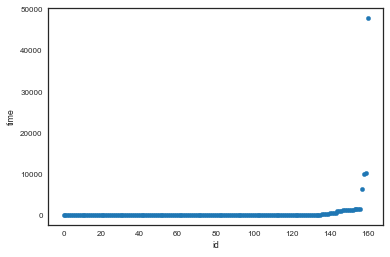

In [141]:
sub_dt = df['Data - time'].dropna(axis=0, how='all')
list_dt = [dt.split(";\n") for dt in sub_dt]
sub_dt = [float(item) for sublist in list_dt for item in sublist]
sub_dt.sort()

df2 = pd.DataFrame(data={'time':sub_dt})
df2['id'] = list(range(0, len(sub_dt)))

df2.plot(x='id', y='time', kind='scatter')

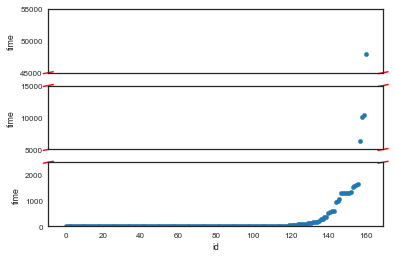

In [181]:
sub_dt = df['Data - time'].dropna(axis=0, how='all')
list_dt = [dt.split(";\n") for dt in sub_dt]
sub_dt = [float(item) for sublist in list_dt for item in sublist]
sub_dt.sort()

df2 = pd.DataFrame(data={'time':sub_dt})
df2['id'] = list(range(0, len(sub_dt)))

f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax.set_ylim(45000,55000)  # outliers only
ax2.set_ylim(5000, 15000)  # most of the data
ax3.set_ylim(0, 2500)

# plot the same data on both axes
df2.plot(x='id', y='time', kind='scatter', ax=ax)
df2.plot(x='id', y='time', kind='scatter', ax=ax2)
df2.plot(x='id', y='time', kind='scatter', ax=ax3)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='r', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs = dict(transform=ax2.transAxes, color='r', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.savefig("../figs/{}.eps".format("DataTime"), bbox_inches='tight', format='eps', dpi=1000)

In [9]:
# ToDo: subplot per main domain.

# Data Quantity - Nb Samples (i.e. trials/epochs)

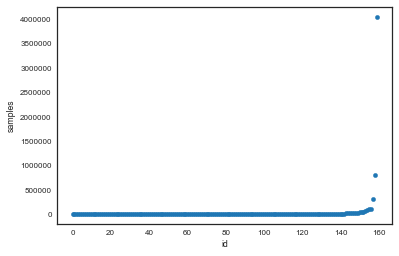

In [120]:
sub_ds = df['Data - samples'].dropna(axis=0, how='all')
list_ds = [ds.split(";\n") for ds in sub_ds]
sub_ds = [float(item) for sublist in list_ds for item in sublist]
sub_ds.sort()

df2 = pd.DataFrame(data={'samples':sub_ds})
df2['samples'] = df2['samples'].astype('float')
df2['id'] = list(range(0, len(sub_ds)))

df2.plot(x='id', y='samples', kind='scatter')

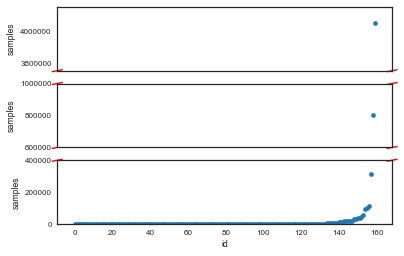

In [164]:
sub_ds = df['Data - samples'].dropna(axis=0, how='all')
list_ds = [ds.split(";\n") for ds in sub_ds]
sub_ds = [float(item) for sublist in list_ds for item in sublist]
sub_ds.sort()

df2 = pd.DataFrame(data={'samples':sub_ds})
df2['samples'] = df2['samples'].astype('float')
df2['id'] = list(range(0, len(sub_ds)))

f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax.set_ylim(3750000, 4150000)  # outliers only
ax2.set_ylim(600000, 1000000)  # most of the data
ax3.set_ylim(0, 400000)

# plot the same data on both axes
df2.plot(x='id', y='samples', kind='scatter', ax=ax)
df2.plot(x='id', y='samples', kind='scatter', ax=ax2)
df2.plot(x='id', y='samples', kind='scatter', ax=ax3)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='r', clip_on=False, )
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs = dict(transform=ax2.transAxes, color='r', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

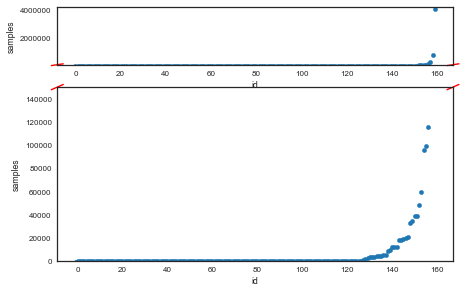

In [180]:
sub_ds = df['Data - samples'].dropna(axis=0, how='all')
list_ds = [ds.split(";\n") for ds in sub_ds]
sub_ds = [float(item) for sublist in list_ds for item in sublist]
sub_ds.sort()

df2 = pd.DataFrame(data={'samples':sub_ds})
df2['samples'] = df2['samples'].astype('float')
df2['id'] = list(range(0, len(sub_ds)))

# plot it
fig = plt.figure()#figsize=(8, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3]) 
ax = plt.subplot(gs[0])
ax.plot(x, y)
ax2 = plt.subplot(gs[1])
ax2.plot(y, x)

plt.tight_layout()

#f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

#ax2.set_ylim(3750000, 4150000)  # outliers only
ax.set_ylim(100000, 4200000)  # most of the data
ax2.set_ylim(0, 150000)

# plot the same data on both axes
df2.plot(x='id', y='samples', kind='scatter', ax=ax2)
df2.plot(x='id', y='samples', kind='scatter', ax=ax)
#df2.plot(x='id', y='samples', kind='scatter', ax=ax3)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='r', clip_on=False, )
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.savefig("../figs/{}.eps".format("DataSamples"), bbox_inches='tight', format='eps', dpi=1000)

In [79]:
# ToDo: subplot per main domain.

# Data Augmentation

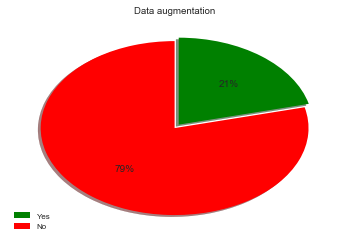

[33, 123]

In [99]:
col_name = 'Data augmentation'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.

dftmp = df[col_name].replace('N/M', 'No')
dftmp[dftmp != 'No'] = 'Yes'

values = [dftmp.value_counts()[col_options[0]], dftmp.value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.05, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("../figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

values

## Data Accessibility

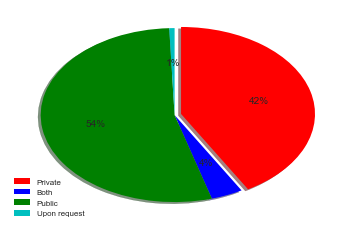

In [42]:
col_name = 'Dataset accessibility'
col_options = ['Private', 'Both', 'Public', 'Upon request']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0.05, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
#plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("../figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

## Code Accessibility

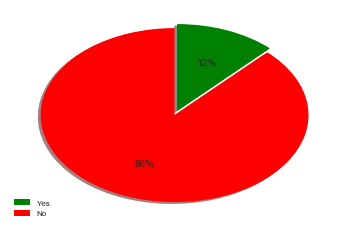

In [38]:
col_name = 'Code available'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.05, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
#plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("../figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

#print(df[df['Code available'] == 'Yes']['Citation'])

## Code Sharing Platforms

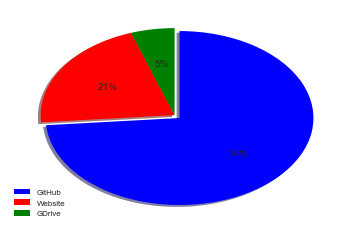

In [39]:
col_name = 'Code hosted on'
col_options = ['GitHub', 'Website', 'GDrive']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]]]
colors = ['b', 'r', 'g']
explode = (0.05, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
#plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("../figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

#sns.countplot(y='Code hosted on', data=df[df['Code hosted on'] != 'N/A'])
#plt.savefig("../figs/{}.eps".format('Code hosted on'), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()

## Limited Data Available

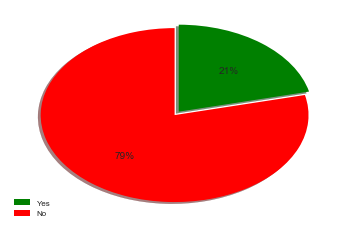

In [40]:
col_name = 'Limited data'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.05, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
#plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("../figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Datasets

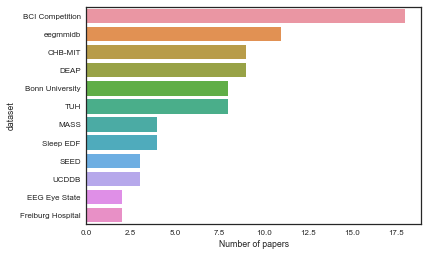

In [68]:
import collections

def remove_me(ds, item_name):
    ds2 = [y for y in ds if y != item_name]
    return ds2

datasets = df['Dataset name']
datasets_full = [dsname.split(";\n") for dsname in datasets]
datasets_ffull = [item for sublist in datasets_full for item in sublist]  

# Combining Datasets
combine_ds = ["BCI Competition", "TUH"]
for c in combine_ds:
    for n, i in enumerate(datasets_ffull):
        if c in i:
            datasets_ffull[n] = c

# Removing Datasets
a = remove_me(datasets_ffull,"Internal Recordings")
for ds in collections.Counter(a).items():
    if ds[1] < 2:
        #print("Removing (<2): " + ds[0])
        a = remove_me(a, ds[0])
        
ds_df = (pd.DataFrame.from_dict(collections.Counter(a), orient='index').reset_index()).rename(columns={'index':'dataset', 0:'count'})
ds_df['Main domain'] = df['Main domain']
#print(ds_df)

sortd = ds_df.groupby(["dataset"])['count'].aggregate(np.median).reset_index().sort_values('count', ascending=False)
ax = sns.barplot(y='dataset', x='count', order=sortd["dataset"], data=ds_df)
plt.xlabel('Number of papers')

plt.savefig("../figs/{}.eps".format("Datasets"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Network Schema

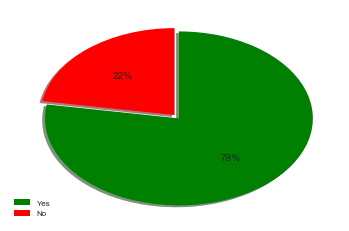

In [46]:
col_name = 'Network Schema'
col_options = ['Yes', 'No']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.05, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
#plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("../figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Reproducibility - Easy/Medium/Hard/Impossible

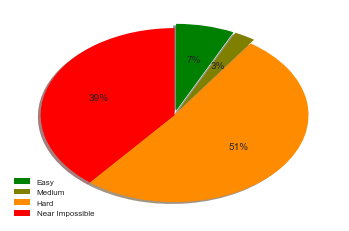

In [43]:
df_easy = df[(df['Code available'] == 'Yes') & (df['Dataset accessibility'] == 'Public')] # Shared Code + Data.
df_medium = df[(df['Code available'] == 'Yes') & (df['Dataset accessibility'] == 'Both')] # Shared Code + Private & Public Data.
df_impossible = df[(df['Code available'] == 'No') & (df['Dataset accessibility'] == 'Private')] # Nothing is shared.

a = len(df_easy)
b = len(df_medium)
c = len(df_impossible)
d = len(df) - a - b - c

col_name = 'Reproducibility of studies'
col_options = ['Easy', 'Medium', 'Hard', 'Near Impossible']    # To control the order and plot color/explode.
values = [a,b,d,c]
colors = ['g', 'olive', 'darkorange', 'r']
explode = (0.05, 0.05, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
#plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("../figs/{}.eps".format("Reproducibility of studies"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

#print('Easy:')
#print(df_easy['Citation'])
#print('Medium:')
#print(df_medium['Citation'])

# Architectures

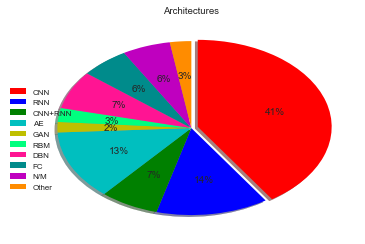

In [88]:
col_name = 'Architecture (clean)'
col_options = ['CNN', 'RNN', 'CNN+RNN', 'AE', 'GAN', 'RBM', 'DBN', 'FC', 'N/M', 'Other']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]], df[col_name].value_counts()[col_options[4]], df[col_name].value_counts()[col_options[5]], df[col_name].value_counts()[col_options[6]], df[col_name].value_counts()[col_options[7]], df[col_name].value_counts()[col_options[8]], df[col_name].value_counts()[col_options[9]]]
colors = ['r', 'b', 'g', 'c', 'y', 'springgreen', 'deeppink', 'darkcyan', 'm', 'darkorange']
explode = (0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Architectures')
plt.legend(col_options, loc=(-0.05, 0.2))
save_str = 'architec_dist'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Features

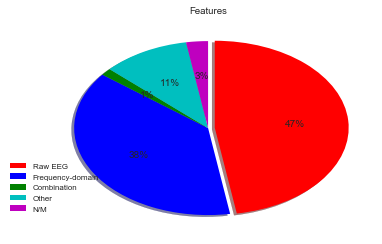

In [89]:
col_name = 'Features (clean)'
col_options = ['Raw EEG', 'Frequency-domain', 'Combination', 'Other',  'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]], df[col_name].value_counts()[col_options[4]]]
colors = ['r', 'b', 'g', 'c', 'm']
explode = (0.05, 0, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Features')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'feat_distribution'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Number of layers

In [90]:
col_name = 'Layers (clean)'
df_layers_rep = df[(df[col_name] != 'N/M')] # Papers that reported #layers
df_layers_not_rep = df[(df['Layers (clean)'] == 'N/M')]
print(len(df_layers_not_rep))
range_ = [0, 3, 10, 15, 20, 100]
values = pd.to_numeric(df_layers_rep[col_name]).value_counts(bins=range_)
print(values)

17
3     69
0     58
10     8
20     2
15     2
Name: Layers (clean), dtype: int64


# Architectures per years

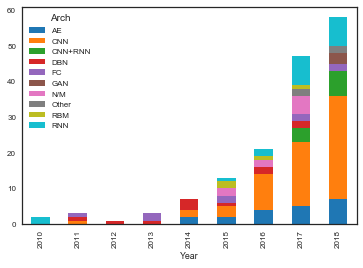

In [91]:
df['Year'] = df['Year'].astype('int32')
col_name = 'Architecture (clean)'
df['Arch'] = df[col_name]
df.groupby(['Year', 'Arch']).size().unstack('Arch').plot(kind='bar', stacked=True, title='')

plt.savefig("../figs/{}.eps".format("archictures_years"), bbox_inches='tight', format='eps', dpi=1000)

# Architectures vs Input type

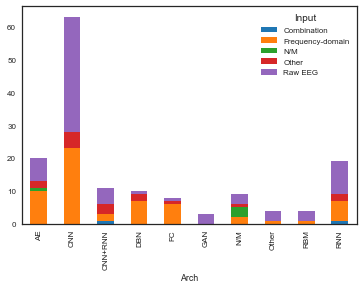

In [92]:
df['Input'] = df['Features (clean)']
col_name = 'Architecture (clean)'
df['Arch'] = df[col_name]
df.groupby(['Input', 'Arch']).size().unstack('Input').plot(kind='bar', stacked=True, title='')

plt.savefig("../figs/{}.eps".format("Arch vs Input"), bbox_inches='tight', format='eps', dpi=1000)

# Training procedure

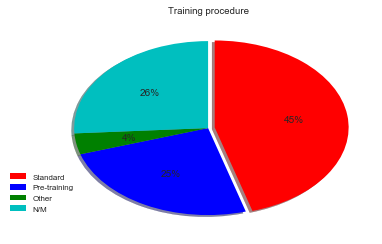

In [93]:
col_name = 'Training procedure (clean)'
col_options = ['Standard', 'Pre-training', 'Other',  'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0.05, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Training procedure')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'training'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Regularization

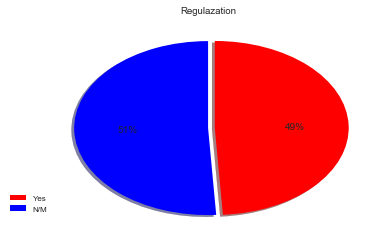

In [94]:
col_name = 'Regularization (clean)'
col_options = ['Yes',  'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['r', 'b']
explode = (0.05, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Regulazation')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'regularization'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Optimizer

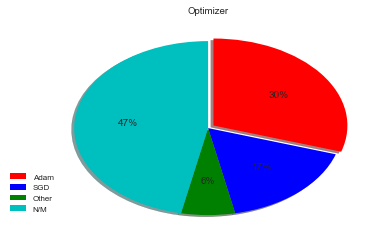

In [95]:
col_name = 'Optimizer (clean)'
col_options = ['Adam', 'SGD', 'Other',  'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0.05, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Optimizer')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'optimizer'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Optimizer per years

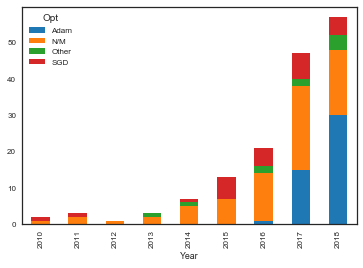

In [96]:
df['Year'] = df['Year'].astype('int32')
col_name = 'Optimizer (clean)'
df['Opt'] = df[col_name]
df.groupby(['Year', 'Opt']).size().unstack('Opt').plot(kind='bar', stacked=True, title='')

plt.savefig("../figs/{}.eps".format("optimizer_years"), bbox_inches='tight', format='eps', dpi=1000)

# Pre-processing

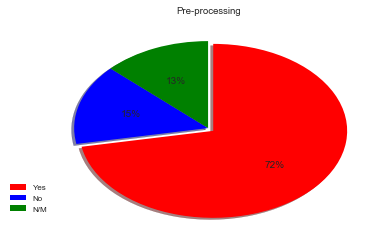

In [97]:
col_name = 'Preprocessing (clean)'
col_options = ['Yes', 'No', 'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]]]
colors = ['r', 'b', 'g']
explode = (0.05, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Pre-processing')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'preprocessing'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Artefact handling

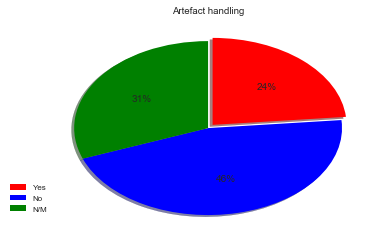

In [98]:
col_name = 'Artefact handling (clean)'
col_options = ['Yes', 'No', 'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]]]
colors = ['r', 'b', 'g']
explode = (0.05, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title('Artefact handling')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'artefact_handling'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Subject: Intra vs Inter

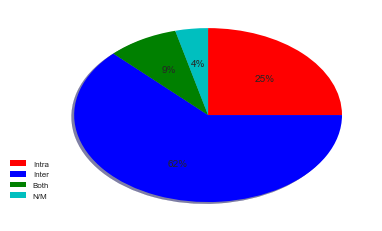

In [48]:
col_name = 'Intra/Inter subject'
col_options = ['Intra', 'Inter', 'Both', 'N/M']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
#plt.title('Inter/Inter-Subject(s)')
plt.legend(col_options, loc=(-0.1, 0.1))
save_str = 'intra-inter_subject'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()


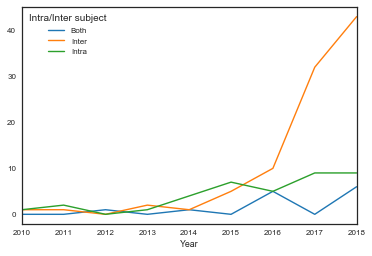

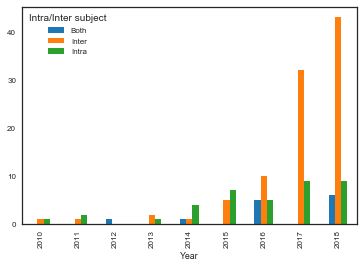

In [104]:
df['Year'] = df['Year'].astype('int32')
col_name = 'Intra/Inter subject'
df2 = df[(df[col_name] == 'Intra') | (df[col_name] == 'Inter') | (df[col_name] == 'Both')]

df2 = df2.groupby(['Year', col_name]).size().unstack(col_name).fillna(0)
#df2_norm = # TODO : Normalized values per year to show the inter vs intra trend, not the overall increased.

df2.plot(kind='line')
df2.plot(kind='bar')

save_str = 'intra-inter_subject_year'
plt.savefig("../figs/{}.eps".format(save_str), bbox_inches='tight', format='eps', dpi=1000)

# Cross-Validation

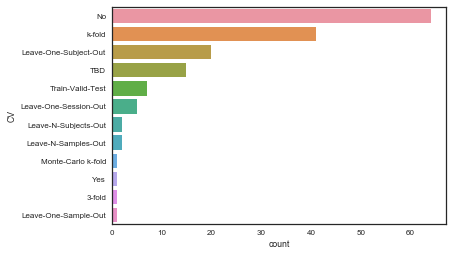

In [47]:
sub_cv = df['Cross validation (clean)'].dropna(axis=0, how='all')

# 1 Paper might use multiple cross-validation (e.g. with different datasets, or intra vs inter)
list_cv = [cv.split(";\n") for cv in sub_cv]
sub_cv = [item for sublist in list_cv for item in sublist]

df2 = pd.DataFrame(data=sub_cv, columns=['CV'])

sns.countplot(y='CV', data=df2, order = df2['CV'].value_counts(ascending=False).index)
#df2['CV'].value_counts().plot(kind="bar")

plt.savefig("../figs/{}.eps".format('Cross validation'), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()

# Data Split

In [102]:
# Do Me (YR)